In [15]:
# FDTD - Finite-Difference Time-Domain
# 1D simulation using Yee's algorithm
# to simulate electromagnetic waves.

#%pip install ipympl put back if not yet installed
%matplotlib ipympl

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [16]:
# parameters
# settings parameters
M = 300  # number of space samples
FREQ_REF = 1e9  # Hz
Q = 1000  # number of time samples


# Constants
e0 = 8.8541878188e-12  # F/m
u0 = 1.25663706127e-6  # H/m
c = 1 / np.sqrt(e0 * u0)  # m/s

In [17]:
# derived parameters
DELTA_X = c / (FREQ_REF * 20)
DELTA_T = 1 / (2 * FREQ_REF * 20)

TOTAL_X = (M - 1) * DELTA_X
TOTAL_T = (Q - 1) * DELTA_T
print("TOTAL_X : ", TOTAL_X, "TOTAL_T : ", TOTAL_T)
print("DELTA_X : ", DELTA_X, "DELTA_T : ", DELTA_T)

TOTAL_X :  4.481897247097326 TOTAL_T :  2.4975e-08
DELTA_X :  0.014989622899991057 DELTA_T :  2.5e-11


In [18]:
# initialise the starting values
E0 = np.zeros((M))
B_tilde_0 = np.zeros((M))

# initialise with a gaussian pulse
E0[int(M / 2) - 100 : int(M / 2) + 100] = np.exp(
    -(np.linspace(-100, 100, 200) ** 2) /100
) / np.sqrt(2 * np.pi)

# initialise the arrays
E = np.zeros((Q, M))
E[0, :] = E0[:]
B_tilde = np.zeros((Q, M))
B_tilde[0, :] = B_tilde_0
# TODO add J the current density

In [19]:
# We consider B_tilde to be half a time step in front of E in the time domain,
# this means that we computing step n for E we use step n-1 for B
# we also consider B_tilde's grid half a step ahead of E's grid in the space domain
# this means that x=0 for E <-> x=0.5 for B_tilde
def forward_E(E: np.array, B_tilde: np.array, q: int):
    """
    modifies E in place at step q
    q : int : has to be between 1 and Q-1
    """
    # limit conditions :
    # E[0] = E[M-1] = 0 (as they already are from the initialisation)

    E[q, 1 : M - 1] = E[q - 1, 1 : M - 1] + (1 / 2) * (
        B_tilde[q - 1, 1 : M - 1] - B_tilde[q - 1, 0 : M - 2]
    )
    

    # TODO add the current density term


def forward_B_tilde(E: np.array, B_tilde: np.array, q: int):
    """
    modifies B_tilde in place at step q
    q : int : the time step : has to be between 1 and Q-1
    """
    # limit conditions :
    # B_tilde[0] = B_tilde[M-1] = 0 (as they already are from the initialisation)

    B_tilde[q, 0 : M - 1] = B_tilde[q - 1, 0 : M - 1] + (1 / 2) * (
        E[q, 1:M] - E[q, 0 : M - 1]
    )


def main():
    for q in range(1, Q):
        forward_E(E, B_tilde, q)
        forward_B_tilde(E, B_tilde, q)

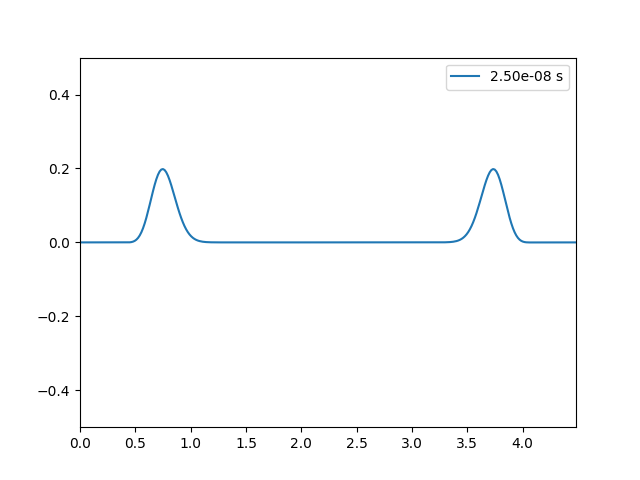

In [ ]:
main()

# animate the results : https://stackoverflow.com/questions/67672601/how-to-use-matplotlibs-animate-function
fig = plt.figure()
axis = plt.axes(xlim=(0, TOTAL_X), ylim=(-0.5, 0.5))

x = np.linspace(0, TOTAL_X, M)
(line,) = plt.plot(x, E[0], label="0 s")
plt.legend()

def updatefig(i):
    line.set_ydata(E[i])
    line.set_label(f"{i * DELTA_T:.2e} s")
    plt.legend()
    return (line,)

ani = animation.FuncAnimation(
    fig, updatefig, frames=Q, repeat=True, interval=5
)
ani.save("1D gaussian propagation.mp4", fps=30)
